Seeding for reproducibility

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Import dependencies

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Load Data

In [3]:
fashion_mnist = datasets.fashion_mnist

Data Split

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Data Processing

In [5]:
type(train_images)

numpy.ndarray

In [6]:
type(train_labels)

numpy.ndarray

In [8]:
print(len(train_images))

60000


In [9]:
print(len(train_labels))

60000


In [10]:
print(len(test_images))

10000


In [11]:
print(train_images[0].shape)

(28, 28)


In [12]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


In [13]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

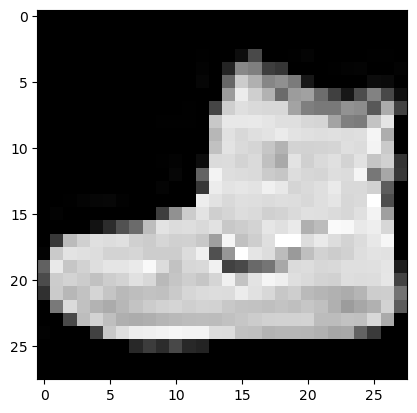

In [14]:
# Display an image from the dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [15]:
print(train_labels[0])

9


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [17]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [18]:
# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [19]:
train_images.shape

(60000, 28, 28, 1)

In [20]:
test_images.shape

(10000, 28, 28, 1)

Convolutional Neural Network

In [21]:
# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Training**

In [23]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4896 - accuracy: 0.8212 - val_loss: 0.3688 - val_accuracy: 0.8679
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3174 - accuracy: 0.8830 - val_loss: 0.3084 - val_accuracy: 0.8883
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2703 - accuracy: 0.9000 - val_loss: 0.3011 - val_accuracy: 0.8895
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2415 - accuracy: 0.9113 - val_loss: 0.2650 - val_accuracy: 0.9033
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2177 - accuracy: 0.9194 - val_loss: 0.2780 - val_accuracy: 0.9027
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1966 - accuracy: 0.9281 - val_loss: 0.2583 - val_accuracy: 0.9084
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1805 - accuracy: 0.9330 - val_loss: 0.2675 - v

**Model Evaluation**

In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2856 - accuracy: 0.9088 - 1s/epoch - 3ms/step

Test accuracy: 0.9088000059127808


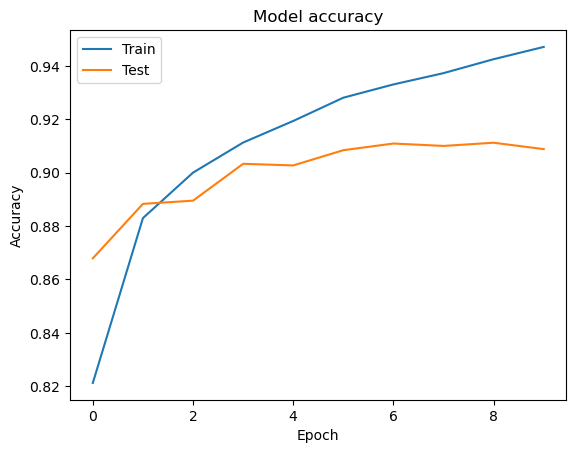

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


313/313 [==============================] - 1s 4ms/step


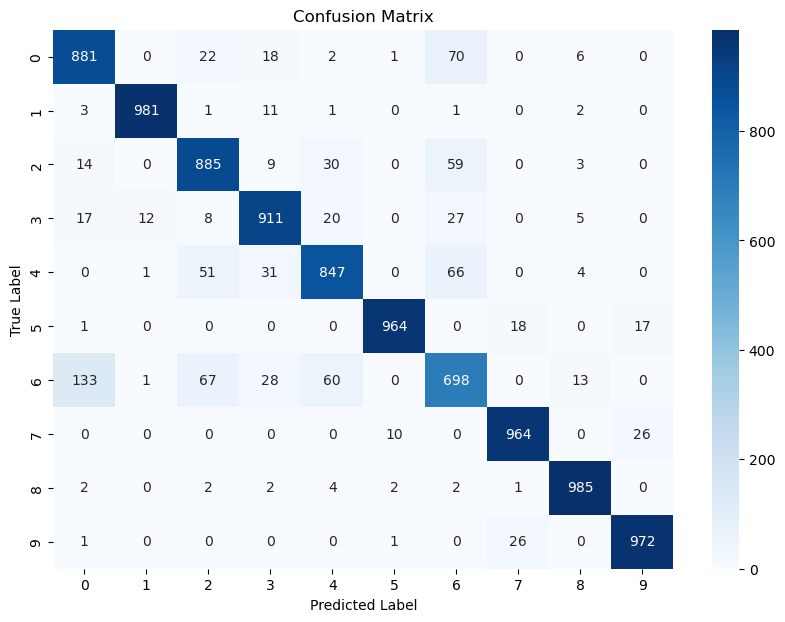

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)

# Plotting
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [28]:
model.save('trained_model.h5')